<a href="https://colab.research.google.com/github/santoshkumarbvp/Deep-Learning/blob/main/Embedding_layer_with_GloVe_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
from tensorflow import keras
import numpy as np
import tensorflow as tf

In [172]:
data_path = keras.utils.get_file(
    "news20.tar.gz",
    "http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.tar.gz",
    untar=True,
)

In [173]:
data_path

'/root/.keras/datasets/news20.tar.gz'

In [174]:
import os
import pathlib

data_dir = pathlib.Path(data_path).parent / "20_newsgroup"
dirnames = os.listdir(data_dir)
print("Number of directories:", len(dirnames))
print("Directory names:", dirnames)

fnames = os.listdir(data_dir / "comp.graphics")
print("Number of files in comp.graphics:", len(fnames))
print("Some example filenames:", fnames[:5])

Number of directories: 20
Directory names: ['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'talk.politics.guns', 'talk.politics.mideast', 'comp.sys.mac.hardware', 'alt.atheism', 'sci.electronics', 'comp.os.ms-windows.misc', 'rec.sport.hockey', 'talk.religion.misc', 'comp.graphics', 'sci.crypt', 'misc.forsale', 'rec.autos', 'sci.med', 'sci.space', 'comp.windows.x', 'rec.motorcycles', 'rec.sport.baseball', 'soc.religion.christian']
Number of files in comp.graphics: 1000
Some example filenames: ['38354', '38943', '39069', '38392', '38220']


In [175]:
data_dir

PosixPath('/root/.keras/datasets/20_newsgroup')

In [176]:
print(open(data_dir / "comp.graphics" / "38987").read())

Newsgroups: comp.graphics
Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!agate!dog.ee.lbl.gov!network.ucsd.edu!usc!rpi!nason110.its.rpi.edu!mabusj
From: mabusj@nason110.its.rpi.edu (Jasen M. Mabus)
Subject: Looking for Brain in CAD
Message-ID: <c285m+p@rpi.edu>
Nntp-Posting-Host: nason110.its.rpi.edu
Reply-To: mabusj@rpi.edu
Organization: Rensselaer Polytechnic Institute, Troy, NY.
Date: Thu, 29 Apr 1993 23:27:20 GMT
Lines: 7

Jasen Mabus
RPI student

	I am looking for a hman brain in any CAD (.dxf,.cad,.iges,.cgm,etc.) or picture (.gif,.jpg,.ras,etc.) format for an animation demonstration. If any has or knows of a location please reply by e-mail to mabusj@rpi.edu.

Thank you in advance,
Jasen Mabus  



In [177]:
samples = []
labels = []
class_names = []
class_index = 0
for dirname in sorted(os.listdir(data_dir)):
    class_names.append(dirname)
    dirpath = data_dir / dirname
    fnames = os.listdir(dirpath)
    print("Processing %s, %d files found" % (dirname, len(fnames)))
    for fname in fnames:
        fpath = dirpath / fname
        f = open(fpath, encoding="latin-1")
        content = f.read()
        lines = content.split("\n")
        lines = lines[10:]
        content = "\n".join(lines)
        samples.append(content)
        labels.append(class_index)
    class_index += 1

print("Classes:", class_names)
print("Number of samples:", len(samples))
print (labels)

Processing alt.atheism, 1000 files found
Processing comp.graphics, 1000 files found
Processing comp.os.ms-windows.misc, 1000 files found
Processing comp.sys.ibm.pc.hardware, 1000 files found
Processing comp.sys.mac.hardware, 1000 files found
Processing comp.windows.x, 1000 files found
Processing misc.forsale, 1000 files found
Processing rec.autos, 1000 files found
Processing rec.motorcycles, 1000 files found
Processing rec.sport.baseball, 1000 files found
Processing rec.sport.hockey, 1000 files found
Processing sci.crypt, 1000 files found
Processing sci.electronics, 1000 files found
Processing sci.med, 1000 files found
Processing sci.space, 1000 files found
Processing soc.religion.christian, 997 files found
Processing talk.politics.guns, 1000 files found
Processing talk.politics.mideast, 1000 files found
Processing talk.politics.misc, 1000 files found
Processing talk.religion.misc, 1000 files found
Classes: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.ha

In [178]:
print(len(samples[2]))

2453


In [211]:
len(labels), len(samples)

(19997, 19997)

In [180]:
# Shuffle the data
seed = 1337
rng = np.random.RandomState(seed)
rng.shuffle(samples)
rng = np.random.RandomState(seed)
rng.shuffle(labels)

# Extract a training & validation split
validation_split = 0.2
num_validation_samples = int(validation_split * len(samples))
train_samples = samples[:-num_validation_samples]
val_samples = samples[-num_validation_samples:]
train_labels = labels[:-num_validation_samples]
val_labels = labels[-num_validation_samples:]

In [181]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorizer.adapt(text_ds)

In [182]:
# Above code basically, learn the vocubulary ( size is predefined as 20000 ) and one size of one sequence should not be more then 200.

In [183]:
vectorizer.get_vocabulary()[:15]


['',
 '[UNK]',
 'the',
 'to',
 'of',
 'a',
 'and',
 'in',
 'is',
 'i',
 'that',
 'it',
 'for',
 'you',
 'this']

In [184]:
output = vectorizer([["the cat sat on the mat"]])
output.numpy()[0, :6]

array([   2, 3738, 1769,   15,    2, 6335])

In [185]:
output.numpy()

array([[   2, 3738, 1769,   15,    2, 6335,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [186]:
vectorizer.get_vocabulary()[3738], vectorizer.get_vocabulary()[6335]

('cat', 'mat')

In [187]:
# lets try to vectorizer with unknown words

In [188]:
output = vectorizer([["lol, cat sat on the mat. jijijiji"]])
output.numpy()

## unknown words will be replaced with 1

array([[   1, 3738, 1769,   15,    2, 6335,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

0 is reserved for padding and index 1 is reserved for "out of vocabulary" tokens.

In [189]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [190]:
for items,i in list(word_index.items())[:50]:
  str = f"{(i)} : {items}" 
  if i % 13 == 0:
    print()
  print(str ,end='"   "')
  


0 : "   "1 : [UNK]"   "2 : the"   "3 : to"   "4 : of"   "5 : a"   "6 : and"   "7 : in"   "8 : is"   "9 : i"   "10 : that"   "11 : it"   "12 : for"   "
13 : you"   "14 : this"   "15 : on"   "16 : be"   "17 : not"   "18 : are"   "19 : have"   "20 : with"   "21 : as"   "22 : or"   "23 : if"   "24 : was"   "25 : but"   "
26 : they"   "27 : from"   "28 : by"   "29 : at"   "30 : an"   "31 : can"   "32 : my"   "33 : what"   "34 : would"   "35 : all"   "36 : there"   "37 : will"   "38 : one"   "
39 : do"   "40 : writes"   "41 : about"   "42 : we"   "43 : so"   "44 : has"   "45 : your"   "46 : he"   "47 : article"   "48 : no"   "49 : any"   "

In [191]:
# connect to glove vector

In [192]:
# Load GloVe's embeddings
embeddings_index = {}
with open('/content/drive/MyDrive/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding

print('Word embeddings:', len(embeddings_index))

Word embeddings: 400000


In [193]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 17962 words (2038 misses)


In [194]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)


In [195]:
num_tokens,embedding_dim, embedding_matrix.shape

(20002, 100, (20002, 100))

In [196]:
from tensorflow.keras import layers

int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 100)         2000200   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 128)         64128     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 128)         82048     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 128)         8204

In [197]:
keras.Input(shape=(None,), dtype="int64")

<KerasTensor: shape=(None, None) dtype=int64 (created by layer 'input_4')>

In [198]:
x_train = vectorizer(np.array([[s] for s in train_samples])).numpy()
x_val = vectorizer(np.array([[s] for s in val_samples])).numpy()


In [199]:
len(train_samples)

15998

In [200]:
x_train.shape

(15998, 200)

In [201]:
y_train = np.array(train_labels)
y_val = np.array(val_labels)

In [202]:
y_train.shape

(15998,)

In [203]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
125/125 [==============================] - 32s 243ms/step - loss: 2.9072 - acc: 0.0879 - val_loss: 2.0883 - val_acc: 0.2896
Epoch 2/5
125/125 [==============================] - 30s 241ms/step - loss: 2.1006 - acc: 0.2769 - val_loss: 1.5369 - val_acc: 0.4856
Epoch 3/5
125/125 [==============================] - 30s 239ms/step - loss: 1.5951 - acc: 0.4598 - val_loss: 1.2673 - val_acc: 0.5601
Epoch 4/5
125/125 [==============================] - 29s 235ms/step - loss: 1.3212 - acc: 0.5508 - val_loss: 1.2085 - val_acc: 0.5829
Epoch 5/5
125/125 [==============================] - 30s 240ms/step - loss: 1.1398 - acc: 0.6067 - val_loss: 1.2905 - val_acc: 0.5776


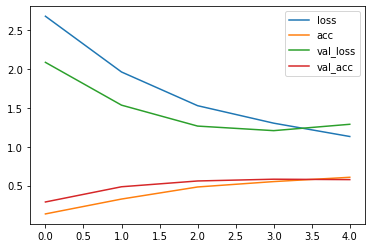

In [205]:
import pandas as pd
pd.DataFrame(model.history.history).plot()

In [206]:
string_input = keras.Input(shape=(1,), dtype="string")
x = vectorizer(string_input)
preds = model(x)
end_to_end_model = keras.Model(string_input, preds)

probabilities = end_to_end_model.predict(
    [["this message is about computer graphics and 3D modeling"]]
)

class_names[np.argmax(probabilities[0])]

'comp.graphics'

In [210]:
(probabilities[0])

array([6.9345726e-05, 8.1543744e-01, 3.7391186e-02, 2.3994492e-03,
       1.3533341e-03, 1.3063201e-01, 7.9921326e-03, 1.3144154e-04,
       1.1010761e-04, 1.3353297e-04, 5.9862017e-05, 4.5750619e-04,
       2.0668118e-03, 4.8905669e-04, 1.0040741e-03, 7.5052544e-06,
       5.5290184e-05, 6.0536349e-05, 6.1544808e-05, 8.7788285e-05],
      dtype=float32)

In [226]:
samples[9], labels[9]

("Sender: news@bu.edu\nOrganization: Boston University Center for Adaptive Systems\nLines: 32\nIn-reply-to: amehdi@src.honeywell.com's message of 15 Apr 93 03:13:49 GMT\n\n>>>>> On 15 Apr 93 03:13:49 GMT, amehdi@src.honeywell.com (Hossien Amehdi) said:\nIn article <1993Apr15.031349.21824@src.honeywell.com> amehdi@src.honeywell.com (Hossien Amehdi) writes:\n . . . \n>> Who is the you Arabs here.  Since you are replying to my article you\n>> are assuming that I am an Arab.  Well, I'm not an Arab, but I think you\n>> are brain is full of shit if you really believe what you said.  The\n>> bombardment of civilian and none civilian areas in Lebanon by Israel is\n>> very consistent with its policy of intimidation.  That is the only\n>> policy that has been practiced by the so called only democracy in\n>> the middle east!\n\n>> I was merley pointing out that the other side is also suffering.\n>> Like I said, I'm not an Arab but if I was, say a Lebanese, you bet\n>> I would defende my homeland 

In [218]:
test = r"If they had listening\ndevices in place, one would think they would have audiotapes as a result"

In [219]:
test

'If they had listening\\ndevices in place, one would think they would have audiotapes as a result'

In [225]:
probabilities = end_to_end_model.predict(
    [[samples[2999]]]
)

np.argmax(probabilities[0])

14

In [227]:
labels[9]

17